<div style="text-align:right;">Justine Charrel - Master 1 Internship</div>

This script calculate the differences between the radiosoundings of MOSAiC and them of ERA5.

It will be used to realize unsupervised machine learning (self-organizing maps) on relative humidity. 

### IMPORT

In [1]:
from netCDF4 import Dataset as ncfile
import numpy as np
from netCDF4 import num2date
import matplotlib.dates as dates

### READ DATA

In [2]:
ppidir = '/lustre/storeB/users/justinec/master_internship/data/ERA5_MOSAiC/'
data_link  = ppidir + 'concatenated_ERA5_MOSAiC.nc'

data = ncfile(data_link,'r')    #dataset of radiosoundings of MOSAiC and ERA5

In [3]:
pres = data.variables['pres'][:]
lat = data.variables['lat_mosaic'][:] 
lon = data.variables['lon_mosaic'][:]
time = data.variables['time_mosaic'][:]
era5_temp = data.variables['temp_era5'][:]
era5_rh = data.variables['rh_era5'][:]
era5_wdir = data.variables['wdir_era5'][:]
era5_wspeed = data.variables['wspeed_era5'][:]
mosaic_temp = data.variables['temp_mosaic'][:]
mosaic_rh = data.variables['rh_mosaic'][:]
mosaic_wdir = data.variables['wdir_mosaic'][:]
mosaic_wspeed = data.variables['wspeed_mosaic'][:]

In [4]:
def convert_time(dataset) :
    dataset_time = dataset.variables['time_mosaic']
    t_unit = dataset_time.units
    t_cal = dataset_time.calendar
    dataset_nctime=[]; 
    dataset_nctime.append(num2date(dataset_time,units = t_unit,calendar = t_cal, only_use_python_datetimes=True, only_use_cftime_datetimes=False)) #datetime of type 2019-10-01 00:00:00
    #dates.date2num --> convert datetime objects to Matplotlib dates (better for compare ERA5 and MOSAiC times and for figures)
    #np.squeeze --> pass Matplotlib dates in column instead of in line
    dataset_nctimenum = np.squeeze(dates.date2num(dataset_nctime))
    return dataset_nctime,dataset_nctimenum,t_unit

In [5]:
nctime, nctimenum, t_unit = convert_time(data)

### CALCULATE THE BIASES BETWEEN ERA5 AND MOSAiC

In [84]:
mosaic_rh[559][11] = np.nan

In [85]:
temp_bias = era5_temp-mosaic_temp
rh_bias = era5_rh-mosaic_rh
wspeed_bias = era5_wspeed-mosaic_wspeed

In [86]:
# need to use direction errors
wdir_bias = era5_wdir-mosaic_wdir
for i in range(len(wdir_bias)) :
    for n in range(len(wdir_bias[i])) :
        if wdir_bias[i][n] > 180 :
            wdir_bias[i][n] = wdir_bias[i][n]-360
        if wdir_bias[i][n] < -180 :
            wdir_bias[i][n] = wdir_bias[i][n]+360

### PLOT

In [87]:
def plotbiases() :
    
    import matplotlib.gridspec as gridspec
    from matplotlib import pyplot as plt

    parameters = {'axes.labelsize':20, 'axes.titlesize':20, 'legend.fontsize':16, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                  'legend.title_fontsize':20, 'figure.titlesize':25}
    plt.rcParams.update(parameters)

    fig, axs = plt.subplots(1,4,figsize=(30,15))
    for i in range(len(temp_bias)) :
        axs[0].plot(temp_bias[i],pres)
    axs[0].invert_yaxis()
    axs[0].set_xlabel ('T [K]')
    axs[0].set_ylabel ('Pressure [hPa]')

    for i in range(len(rh_bias)) :
        axs[1].plot(rh_bias[i], pres)
    axs[1].invert_yaxis()
    axs[1].set_xlabel ('RH [%]')

    for i in range(len(wdir_bias)) :
        axs[2].plot(wdir_bias[i],pres)
    axs[2].invert_yaxis()
    axs[2].set_xlabel (r'Wind direction [degree]')

    for i in range(len(wspeed_bias)) :
        axs[3].plot(wspeed_bias[i],pres)
    axs[3].invert_yaxis()
    axs[3].set_xlabel (r'Wind speed [$m.s^{-1}$]')


    #date = day + '/' + month + '/' + year + ' ' + hour + ':' + date_task[10:12] + ':' + date_task[12:14]
    #fig.suptitle(date, size=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)
    path_fig = '/lustre/storeB/users/justinec/master_internship/figures/era5_mosaic_biases/'
    #plt.savefig(path_fig+'fig_biases_'+date_task+'.png')

In [68]:
for i in range(len(rh_bias)) :
    for n in range(len(rh_bias[i])) :
        if rh_bias[i][n] < -10e10 :
            print('outlier value',i,n)

outlier value 559 11


In [64]:
mosaic_rh[559][11]

9.969209968386869e+36

In [69]:
era5_rh[559][11]

80.29721177158197

In [71]:
nctime[0][559][11]

real_datetime(2020, 2, 20, 17, 10, 8, 714000)

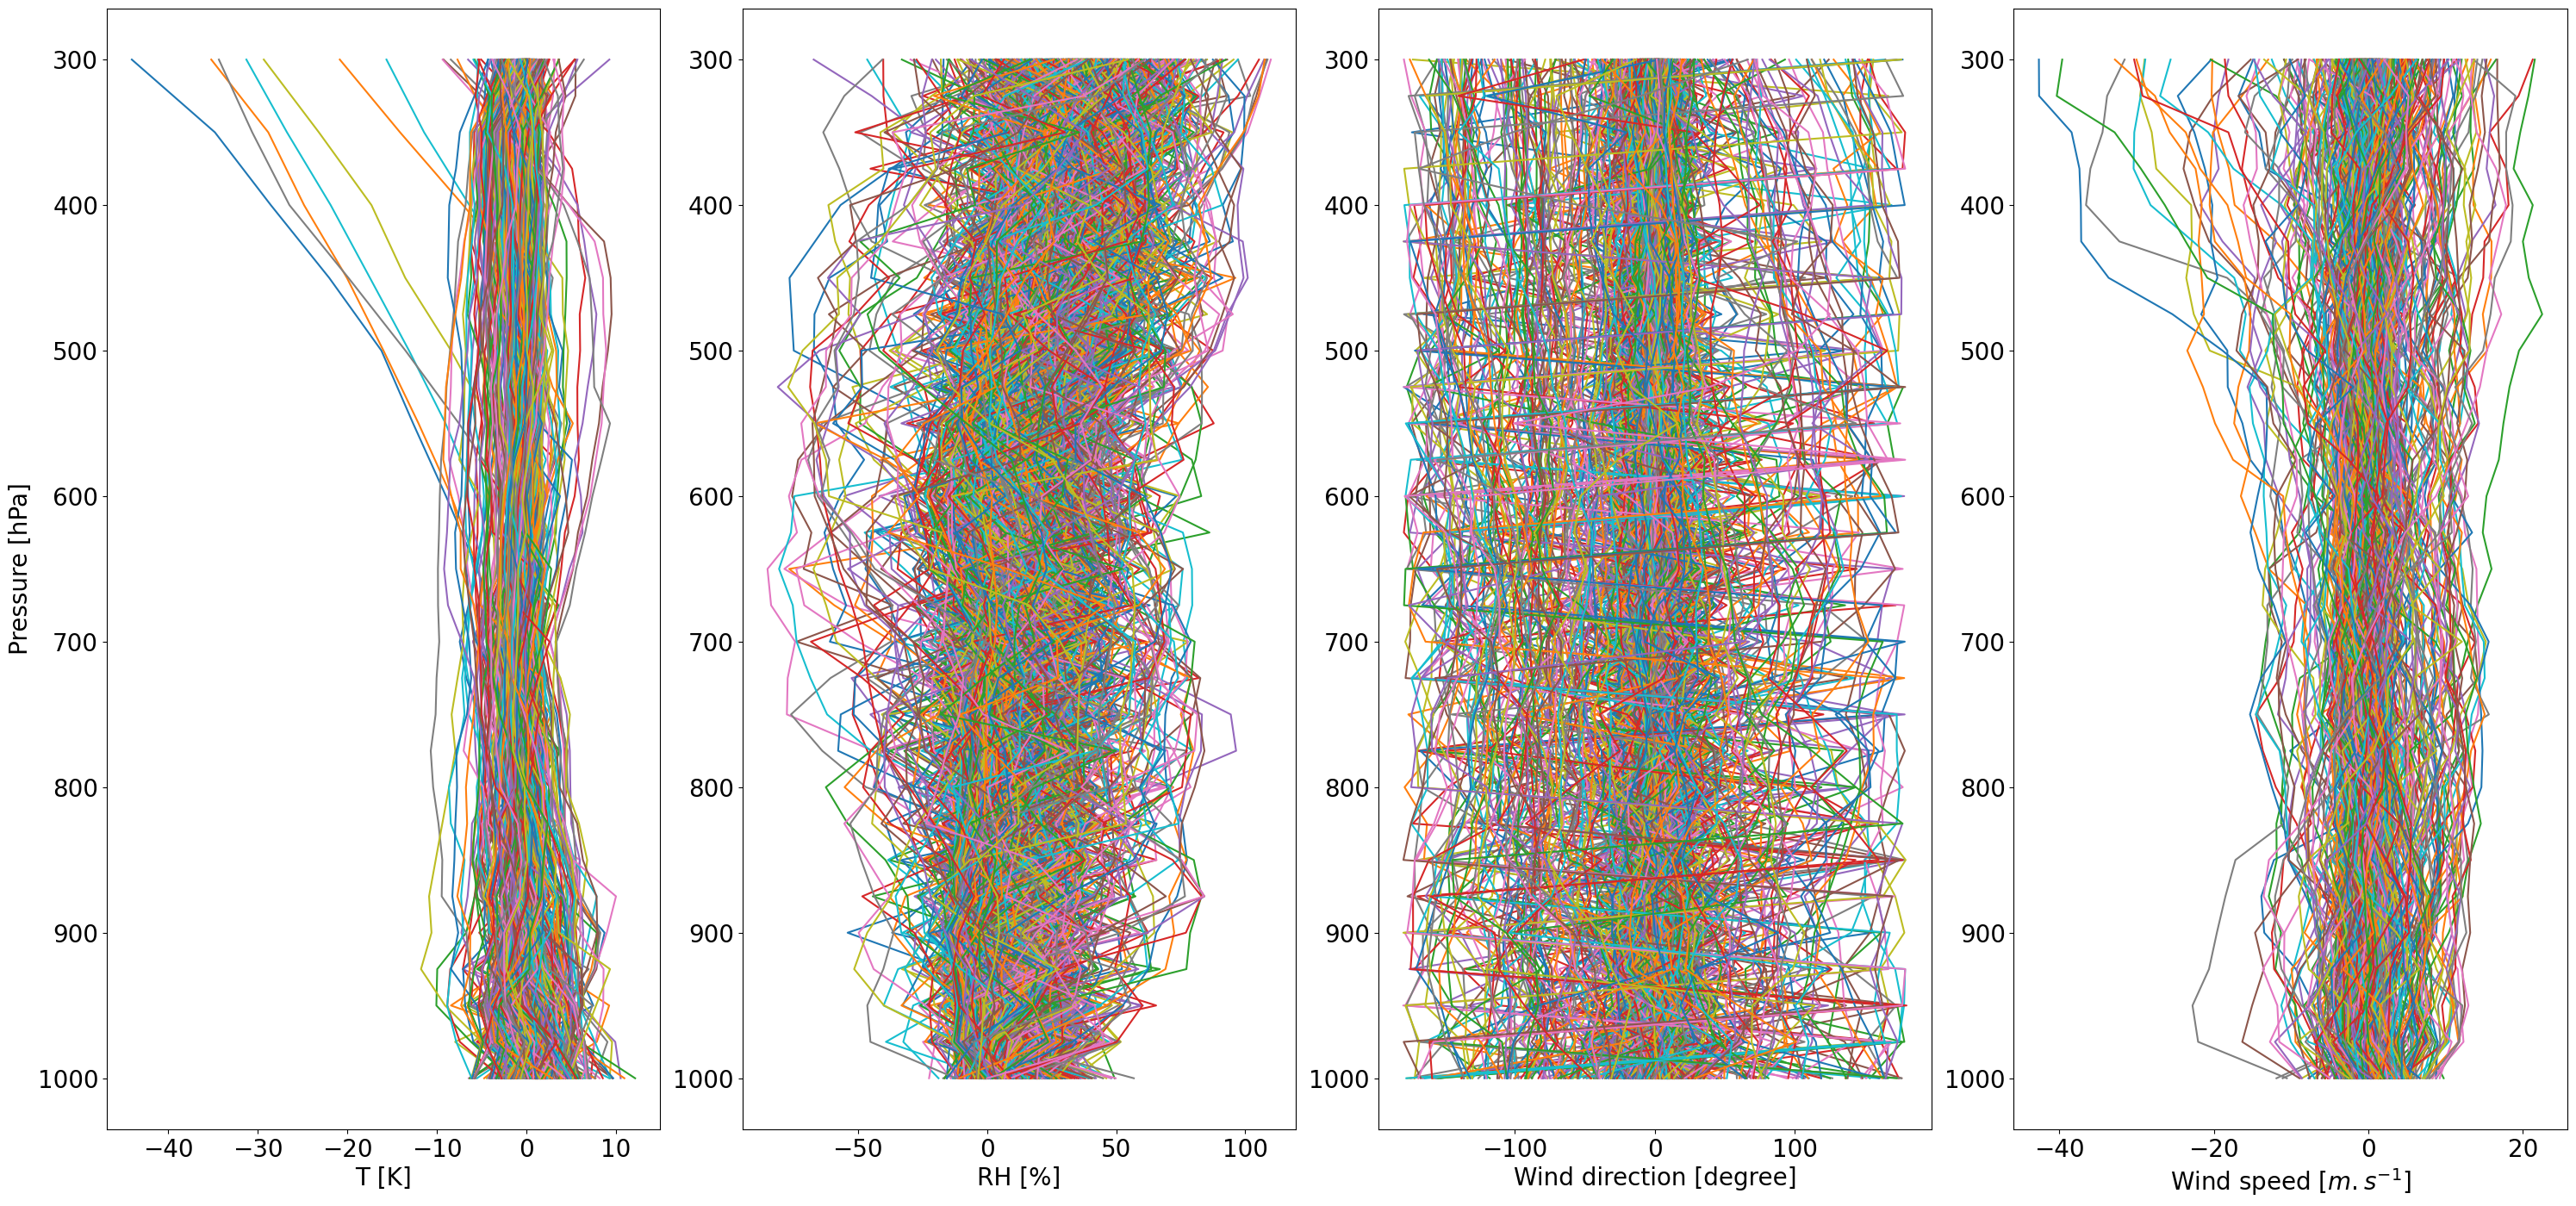

In [88]:
plotbiases() #comment this line to not plot figures
#positive = surestimation in ERA5